# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
# import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
# import melp
import melp.taft

Welcome to JupyROOT 6.24/06


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("run42_20000.root")
#mu3e_detector = Detector.initFromROOT("soted_truth.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
melp.taft.select(mu3e_detector)

In [7]:
mu3e_detector.TileDetector.tile[202003].dt
dt = []
for tile in mu3e_detector.TileDetector.tile:
    dt.append(mu3e_detector.TileDetector.tile[tile].dt)

In [8]:
dt = np.array(dt)

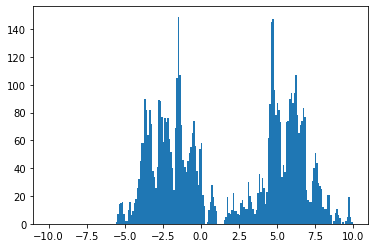

In [9]:
plt.hist(dt, bins=200, range=(-10,10))
plt.show()

In [10]:
%%capture
resid_z, resid_phi, cal = melp.taft.calibrate("run42_20000.root")

Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero


In [11]:
resid_z = np.array(resid_z)
resid_phi = np.array(resid_phi)

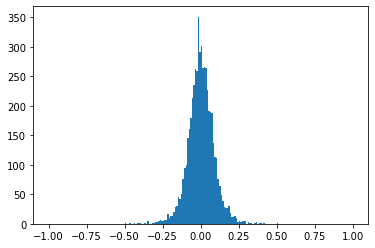

In [12]:
plt.hist(resid_z, bins=200, range=(-1,1))
plt.show()

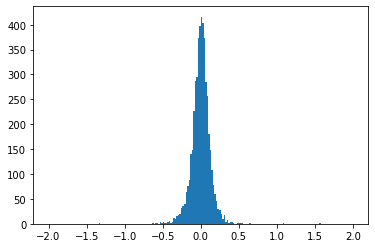

In [13]:
plt.hist(resid_phi, bins=200, range=(-2,2))
plt.show()

# smal data set results in empty histograms between some tiles
## -> big jumps in dt

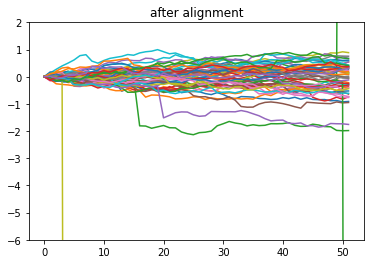

In [17]:
tof = [0]
for i in range(1,52):
    tof.append(-i*0.008)
for phi in cal:
    plt.plot(np.array(cal[phi]-tof, dtype=object))

plt.ylim(-6,2)
plt.title("after alignment")
plt.show()

In [15]:
cal1 = {}
for phi_row in range(56):
    dt_truth = [0]
    for tile in range(0, 51):

        dt_tmp = (mu3e_detector.TileDetector.tile[200000 + phi_row + tile * 56].dt -
                   mu3e_detector.TileDetector.tile[200000 + phi_row + (tile+1) * 56].dt)
        dt_truth.append(dt_truth[-1] + dt_tmp)

    cal1[phi_row] = np.array(dt_truth)


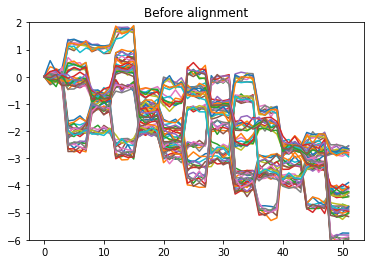

In [16]:
for phi in cal1:
    plt.plot(np.array(cal1[phi], dtype=object))

plt.ylim(-6,2)
plt.title("Before alignment")
plt.show()